In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_dataset

%matplotlib inline

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


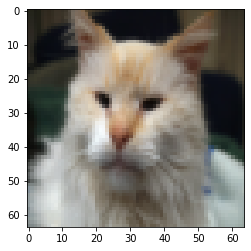

In [3]:
# Example of a picture
index = 27
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig[0].shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [6]:
# Scaling

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [7]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1 / (1 + np.exp(-z))
        
    return s

In [8]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [9]:
# initializing of parameters with zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """    
    
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [11]:
# forward and backward propagation

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * (np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)))
        
    # BACKWARD PROPAGATION (TO FIND GRAD)    
    dw = (1/m) * (np.dot(X, ((A - Y).T)))
    db = (1/m) * (np.sum(A - Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [13]:
# optimization

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation        
        grads, cost = propagate(w, b, X, Y)        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule        
        w = w - learning_rate * dw
        b = b - learning_rate * db
                
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [15]:
# prediction

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture    
    A = sigmoid(np.dot(w.T, X) + b)
        
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]        
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
            
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [16]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [17]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
            
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "non-cat" picture.


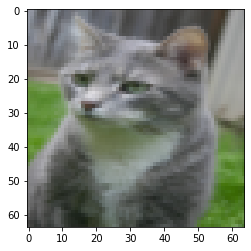

In [19]:
# Example of a picture that was wrongly classified
index = 46
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

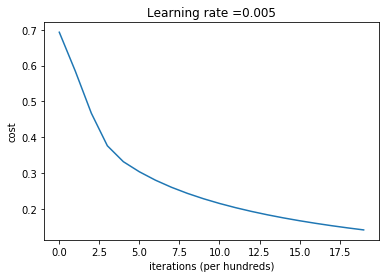

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



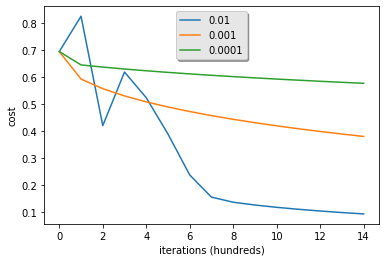

In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

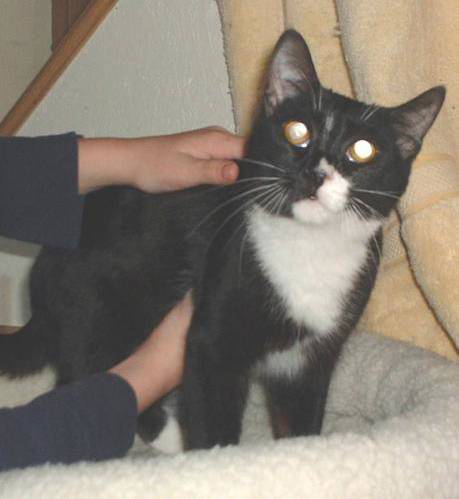

In [22]:
# Example for arbitrary image

from PIL import Image

my_image = "images/cat.jpg"
image_example = Image.open(my_image)

image_example

(64, 64, 3)
y = 1.0, your algorithm predicts a "cat" picture.


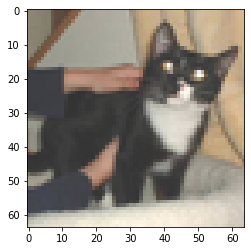

In [23]:
# preprocessing the image for algorithm.

image_example = image_example.resize((num_px, num_px))
image_example_arr = np.asarray(image_example)
image_example_arr = image_example_arr / 255.
image_example_flatten = image_example_arr.reshape((num_px*num_px*3, 1))

my_predicted_image = predict(d["w"], d["b"], image_example_flatten)

plt.imshow(image_example_arr)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [24]:
# Using tensorflow for solving this problem

from tensorflow.keras import layers, models, optimizers

output_size = 1

model = models.Sequential()
model.add(layers.Dense(output_size, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
NUM_EPOCHS = 500

model.fit(train_set_x.T, train_set_y.T, epochs = NUM_EPOCHS, verbose=2)

Train on 209 samples
Epoch 1/500
209/209 - 3s - loss: 12.5378 - accuracy: 0.4976
Epoch 2/500
209/209 - 0s - loss: 6.8781 - accuracy: 0.5359
Epoch 3/500
209/209 - 0s - loss: 5.6894 - accuracy: 0.5694
Epoch 4/500
209/209 - 0s - loss: 6.6044 - accuracy: 0.5311
Epoch 5/500
209/209 - 0s - loss: 6.6241 - accuracy: 0.5024
Epoch 6/500
209/209 - 0s - loss: 5.3762 - accuracy: 0.5598
Epoch 7/500
209/209 - 0s - loss: 6.0515 - accuracy: 0.4928
Epoch 8/500
209/209 - 0s - loss: 4.5997 - accuracy: 0.5981
Epoch 9/500
209/209 - 0s - loss: 5.2661 - accuracy: 0.5789
Epoch 10/500
209/209 - 0s - loss: 3.1763 - accuracy: 0.6699
Epoch 11/500
209/209 - 0s - loss: 6.1500 - accuracy: 0.5407
Epoch 12/500
209/209 - 0s - loss: 4.4255 - accuracy: 0.6124
Epoch 13/500
209/209 - 0s - loss: 4.0025 - accuracy: 0.6029
Epoch 14/500
209/209 - 0s - loss: 5.4917 - accuracy: 0.5789
Epoch 15/500
209/209 - 0s - loss: 3.0845 - accuracy: 0.6699
Epoch 16/500
209/209 - 0s - loss: 5.2887 - accuracy: 0.6124
Epoch 17/500
209/209 - 0s -

Epoch 137/500
209/209 - 0s - loss: 3.1442 - accuracy: 0.7512
Epoch 138/500
209/209 - 0s - loss: 0.0976 - accuracy: 0.9713
Epoch 139/500
209/209 - 0s - loss: 3.0032 - accuracy: 0.7368
Epoch 140/500
209/209 - 0s - loss: 2.9532 - accuracy: 0.7703
Epoch 141/500
209/209 - 0s - loss: 0.2260 - accuracy: 0.9474
Epoch 142/500
209/209 - 0s - loss: 1.9023 - accuracy: 0.7608
Epoch 143/500
209/209 - 0s - loss: 0.5657 - accuracy: 0.8995
Epoch 144/500
209/209 - 0s - loss: 1.8753 - accuracy: 0.8995
Epoch 145/500
209/209 - 0s - loss: 1.9029 - accuracy: 0.8373
Epoch 146/500
209/209 - 0s - loss: 0.1555 - accuracy: 0.9617
Epoch 147/500
209/209 - 0s - loss: 2.0867 - accuracy: 0.8038
Epoch 148/500
209/209 - 0s - loss: 1.6930 - accuracy: 0.8230
Epoch 149/500
209/209 - 0s - loss: 2.6827 - accuracy: 0.7703
Epoch 150/500
209/209 - 0s - loss: 1.5225 - accuracy: 0.7990
Epoch 151/500
209/209 - 0s - loss: 0.5717 - accuracy: 0.9139
Epoch 152/500
209/209 - 0s - loss: 2.6367 - accuracy: 0.8278
Epoch 153/500
209/209 - 

Epoch 272/500
209/209 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 273/500
209/209 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 274/500
209/209 - 0s - loss: 0.3894 - accuracy: 0.9665
Epoch 275/500
209/209 - 0s - loss: 3.1588 - accuracy: 0.8421
Epoch 276/500
209/209 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 277/500
209/209 - 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 278/500
209/209 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 279/500
209/209 - 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 280/500
209/209 - 0s - loss: 4.7512 - accuracy: 0.7560
Epoch 281/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 282/500
209/209 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 283/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 284/500
209/209 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 285/500
209/209 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 286/500
209/209 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 287/500
209/209 - 0s - loss: 5.3682 - accuracy: 0.8708
Epoch 288/500
209/209 - 

Epoch 404/500
209/209 - 0s - loss: 6.7461e-04 - accuracy: 1.0000
Epoch 405/500
209/209 - 0s - loss: 9.2144e-04 - accuracy: 1.0000
Epoch 406/500
209/209 - 0s - loss: 3.3828 - accuracy: 0.8900
Epoch 407/500
209/209 - 0s - loss: 1.9475 - accuracy: 0.8325
Epoch 408/500
209/209 - 0s - loss: 6.8446e-04 - accuracy: 1.0000
Epoch 409/500
209/209 - 0s - loss: 5.7397e-04 - accuracy: 1.0000
Epoch 410/500
209/209 - 0s - loss: 5.5646e-04 - accuracy: 1.0000
Epoch 411/500
209/209 - 0s - loss: 5.4620e-04 - accuracy: 1.0000
Epoch 412/500
209/209 - 0s - loss: 6.0718e-04 - accuracy: 1.0000
Epoch 413/500
209/209 - 0s - loss: 5.8520e-04 - accuracy: 1.0000
Epoch 414/500
209/209 - 0s - loss: 5.8750e-04 - accuracy: 1.0000
Epoch 415/500
209/209 - 0s - loss: 4.7339e-04 - accuracy: 1.0000
Epoch 416/500
209/209 - 0s - loss: 2.9672 - accuracy: 0.8612
Epoch 417/500
209/209 - 0s - loss: 0.0135 - accuracy: 0.9952
Epoch 418/500
209/209 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 419/500
209/209 - 0s - loss: 0.0012 - a

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12289     
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [27]:
test_loss, test_accuracy = model.evaluate(test_set_x.T, test_set_y.T)

50/50 [==============================] - 0s 8ms/sample - loss: 4.5816 - accuracy: 0.6800


In [28]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))

Test loss: 4.58. Test accuracy: 68.00%


In [29]:
image_example_flatten.shape

(12288, 1)

In [30]:
prediction_single = model.predict(image_example_flatten.T)

print(prediction_single)

[[0.8948872]]


In [31]:
print('With probability {0:.2f}% this is a cat'.format(prediction_single[0][0] * 100))

With probability 89.49% this is a cat


In [32]:
# Example of a picture that was wrongly classified

test_set_x[:, 46].shape

(12288,)

In [33]:
image_mislead = test_set_x[:, 46]
image_mislead = image_mislead[:, np.newaxis]
image_mislead.shape

(12288, 1)

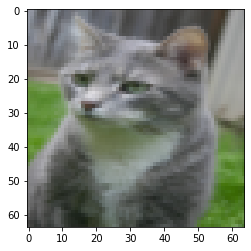

In [34]:
index = 46
image_mislead = test_set_x[:, index]
image_mislead = image_mislead[:, np.newaxis]

plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))

prediction_single = model.predict(image_mislead.T)

In [35]:
print('With probability {0:.2f}% this is a cat'.format(prediction_single[0][0] * 100))

With probability 0.00% this is a cat
